In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
from librosa.display import specshow
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

### Διαβάζουμε απ' το text file το label για διάφορα tracks.

In [2]:
text_file = open('../input/data/data/fma_genre_spectrograms/train_labels.txt', 'r')

for a in text_file:
    print(a)

Id	Genre

1042.fused.full.npy.gz	Blues

1043.fused.full.npy.gz	Blues

1044.fused.full.npy.gz	Blues

1045.fused.full.npy.gz	Blues

1047.fused.full.npy.gz	Blues

1048.fused.full.npy.gz	Blues

11957.fused.full.npy.gz	Blues

123943.fused.full.npy.gz	Blues

123944.fused.full.npy.gz	Blues

123945.fused.full.npy.gz	Blues

123947.fused.full.npy.gz	Blues

123949.fused.full.npy.gz	Blues

123950.fused.full.npy.gz	Blues

123951.fused.full.npy.gz	Blues

123952.fused.full.npy.gz	Blues

123955.fused.full.npy.gz	Blues

123960.fused.full.npy.gz	Blues

123961.fused.full.npy.gz	Blues

123963.fused.full.npy.gz	Blues

12787.fused.full.npy.gz	Blues

12790.fused.full.npy.gz	Blues

12792.fused.full.npy.gz	Blues

12796.fused.full.npy.gz	Blues

12803.fused.full.npy.gz	Blues

12884.fused.full.npy.gz	Blues

12901.fused.full.npy.gz	Blues

13193.fused.full.npy.gz	Blues

13671.fused.full.npy.gz	Blues

15510.fused.full.npy.gz	Blues

16023.fused.full.npy.gz	Blues

16304.fused.full.npy.gz	Blues

17559.fused.full.npy.gz

328.fused.full.npy.gz	Post-Punk

330.fused.full.npy.gz	Post-Punk

331.fused.full.npy.gz	Post-Punk

332.fused.full.npy.gz	Post-Punk

33280.fused.full.npy.gz	Post-Punk

333.fused.full.npy.gz	Post-Punk

335.fused.full.npy.gz	Post-Punk

336.fused.full.npy.gz	Post-Punk

337.fused.full.npy.gz	Post-Punk

338.fused.full.npy.gz	Post-Punk

340.fused.full.npy.gz	Post-Punk

342.fused.full.npy.gz	Post-Punk

343.fused.full.npy.gz	Post-Punk

344.fused.full.npy.gz	Post-Punk

346.fused.full.npy.gz	Post-Punk

349.fused.full.npy.gz	Post-Punk

351.fused.full.npy.gz	Post-Punk

353.fused.full.npy.gz	Post-Punk

354.fused.full.npy.gz	Post-Punk

355.fused.full.npy.gz	Post-Punk

356.fused.full.npy.gz	Post-Punk

357.fused.full.npy.gz	Post-Punk

359.fused.full.npy.gz	Post-Punk

3594.fused.full.npy.gz	Post-Punk

362.fused.full.npy.gz	Post-Punk

363.fused.full.npy.gz	Post-Punk

364.fused.full.npy.gz	Post-Punk

365.fused.full.npy.gz	Post-Punk

367.fused.full.npy.gz	Post-Punk

369.fused.full.npy.gz	Post-Punk

370.fus

### Με επισκόπηση της εξόδου του παραπάνω cell, διαλέγουμε ένα hip-hop και ένα jazz κομμάτι, για να εμφανίσουμε το spectrogram και το chromagram τους. 

In [3]:
import gzip

spectrogram_file1 = '../input/data/data/fma_genre_spectrograms/train/33707.fused.full.npy.gz' #Hip-hop track
spectrogram_file2 = '../input/data/data/fma_genre_spectrograms/train/39586.fused.full.npy.gz' #Jazz track

with gzip.GzipFile(spectrogram_file1, 'r') as f:
    spectrograms1 = np.load(f)

with gzip.GzipFile(spectrogram_file2, 'r') as f:
    spectrograms2 = np.load(f)

# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel1 = spectrograms1[:128]
chroma1 = spectrograms1[128:]

mel2 = spectrograms2[:128]
chroma2 = spectrograms2[128:]

In [4]:
print('Mel Spectrogram shape of a random Hip-Hop track ')

print('(n_features, timesteps)')
print(mel1.shape)

Mel Spectrogram shape of a random Hip-Hop track 
(n_features, timesteps)
(128, 1291)


In [5]:
print('Mel Spectrogram shape of a random Jazz track ')

print('(n_features, timesteps)')
print(mel2.shape)

Mel Spectrogram shape of a random Jazz track 
(n_features, timesteps)
(128, 1293)


In [6]:
print('Chromagram shape of a random  Hip-Hop track')

print('(n_features, timesteps)')
print(chroma1.shape)

Chromagram shape of a random  Hip-Hop track
(n_features, timesteps)
(12, 1291)


In [7]:
print('Chromagram shape of a random Jazz track')

print('(n_features, timesteps)')
print(chroma2.shape)

Chromagram shape of a random Jazz track
(n_features, timesteps)
(12, 1293)


## Spectrograms

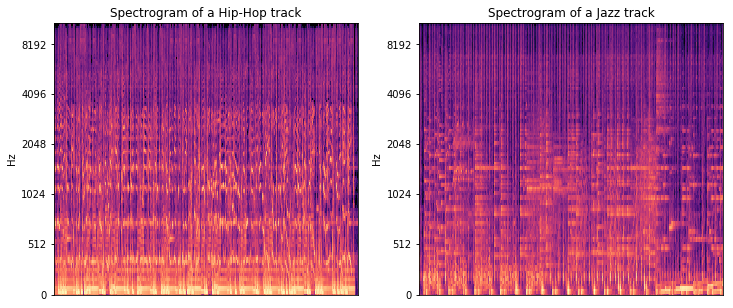

In [8]:
f = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
specshow(mel1, y_axis='mel')
plt.title('Spectrogram of a Hip-Hop track')

plt.subplot(1, 2, 2)
specshow(mel2, y_axis='mel')
plt.title('Spectrogram of a Jazz track')

plt.show()

### Το σπεκτρόγραμμα ενός τραγουδιού απεικονίζει την πληροφορία που φέρει στο πεδίο της συχνότητας, σε συνάρτηση με τον χρόνο. Διαφορετικές τιμές χρώματος ορίζουν διαφορετικές τιμές πυκνότητας για την συγκεκριμένη συχνότητα. Ο άξονας y είναι, συμβατικά, σε λογαριθμική κλίμακα. Στα είδη μουσικής που παρουσιάζουμε από πάνω, βλέπουμε κυρίως διαφορά στην εναλλαγή των συχνοτήτων, όπου στο jazz κομμάτι φαίνεται να γίνεται με κάποιο κανόνα, ενώ στο hip hop ακανόνιστα με τις χαμηλές συχνότητες να κυριαρχούν καθ' όλη τη διάρκεια του τραγουδιού. 

## Chromagrams

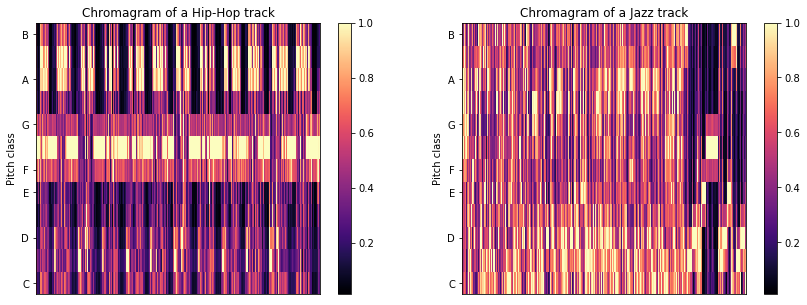

In [9]:
f = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
specshow(chroma1, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram of a Hip-Hop track')

plt.subplot(1, 2, 2)
specshow(chroma2, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram of a Jazz track')

plt.show()

### Η εναλλαγή συχνοτήτων, στην οποία αναφερθήκαμε προηγουμένως, είναι, μάλλον, ακόμα περισσότερο εμφανής στα ανωτέρω χρωμογράμματα.

### Ο πολύ μεγάλος αριθμός timesteps των raw δεδομένων καθιστούν δύσκολη (χρονοβόρα) τη διαδικασία εκπαίδευσης ενός LSTM με αυτά. Για το λόγο αυτό θα χρησημοποιήσουμε beat synced δεδομένα. Ακολουθούμε την ίδια διαδικασία με προηγουμένως:

Mel Spectrogram shape of a random Hip-Hop track 
(n_features, timesteps)
(128, 47)
Mel Spectrogram shape of a random Jazz track 
(n_features, timesteps)
(128, 62)
Chromagram shape of a random  Hip-Hop track
(n_features, timesteps)
(12, 47)
Chromagram shape of a random Jazz track
(n_features, timesteps)
(12, 62)


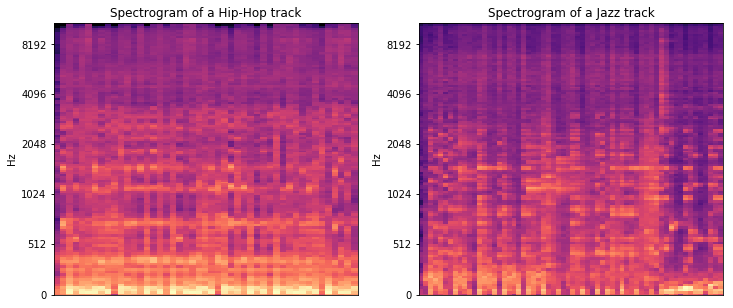

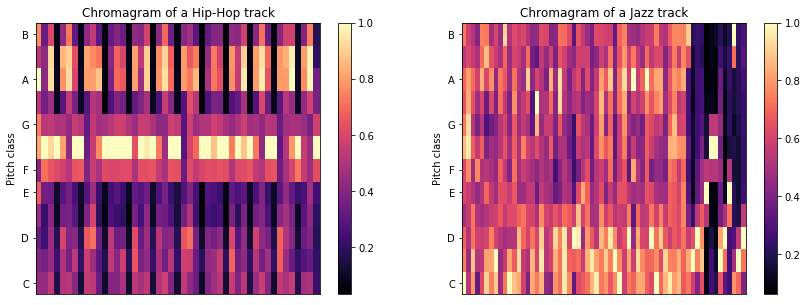

In [10]:
spectrogram_file1 = '../input/data/data/fma_genre_spectrograms_beat/train/33707.fused.full.npy.gz' #Hip-hop track
spectrogram_file2 = '../input/data/data/fma_genre_spectrograms_beat/train/39586.fused.full.npy.gz' #Jazz track

with gzip.GzipFile(spectrogram_file1, 'r') as f:
    spectrograms1 = np.load(f)

with gzip.GzipFile(spectrogram_file2, 'r') as f:
    spectrograms2 = np.load(f)

# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel1 = spectrograms1[:128]
chroma1 = spectrograms1[128:]

mel2 = spectrograms2[:128]
chroma2 = spectrograms2[128:]

print('Mel Spectrogram shape of a random Hip-Hop track ')

print('(n_features, timesteps)')
print(mel1.shape)

print('Mel Spectrogram shape of a random Jazz track ')

print('(n_features, timesteps)')
print(mel2.shape)

print('Chromagram shape of a random  Hip-Hop track')

print('(n_features, timesteps)')
print(chroma1.shape)

print('Chromagram shape of a random Jazz track')

print('(n_features, timesteps)')
print(chroma2.shape)

f = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
specshow(mel1, y_axis='mel')
plt.title('Spectrogram of a Hip-Hop track')

plt.subplot(1, 2, 2)
specshow(mel2, y_axis='mel')
plt.title('Spectrogram of a Jazz track')

plt.show()

f = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
specshow(chroma1, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram of a Hip-Hop track')

plt.subplot(1, 2, 2)
specshow(chroma2, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram of a Jazz track')

plt.show()

### Σχολιασμός: Οι παραπάνω γραφικές αποτελούν ουσιαστικά την έξοδο μιας χειροκίνητης συνέλιξης των αρχικών δεδομένων με παράθυρα κεντραρισμένα στο beat του κάθε τραγουδίου, γι' αυτό και παρατηρούμε το "blurring" στο παραπάνω κελί.

## Φόρτωση δεδομένων σε DataLoaders

In [11]:
import copy
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from torch.utils.data import SubsetRandomSampler, DataLoader

class_mapping = {
    'Rock': 'Rock',
    'Psych-Rock': 'Rock',
    'Indie-Rock': None,
    'Post-Rock': 'Rock',
    'Psych-Folk': 'Folk',
    'Folk': 'Folk',
    'Metal': 'Metal',
    'Punk': 'Metal',
    'Post-Punk': None,
    'Trip-Hop': 'Trip-Hop',
    'Pop': 'Pop',
    'Electronic': 'Electronic',
    'Hip-Hop': 'Hip-Hop',
    'Classical': 'Classical',
    'Blues': 'Blues',
    'Chiptune': 'Electronic',
    'Jazz': 'Jazz',
    'Soundtrack': None,
    'International': None,
    'Old-Time': None
}


def torch_train_val_split(
        dataset, batch_train, batch_eval,
        val_size=.2, shuffle=True, seed=42):
    # Creating data indices for training and validation splits:
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    val_split = int(np.floor(val_size * dataset_size))
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(indices)
    train_indices = indices[val_split:]
    val_indices = indices[:val_split]

    # Creating PT data samplers and loaders:
    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset,
                              batch_size=batch_train,
                              sampler=train_sampler)
    val_loader = DataLoader(dataset,
                            batch_size=batch_eval,
                            sampler=val_sampler)
    return train_loader, val_loader


def read_spectrogram(spectrogram_file, chroma=True):
    with gzip.GzipFile(spectrogram_file, 'r') as f:
        spectrograms = np.load(f)
    # spectrograms contains a fused mel spectrogram and chromagram
    # Decompose as follows
    return spectrograms.T


class LabelTransformer(LabelEncoder):
    def inverse(self, y):
        try:
            return super(LabelTransformer, self).inverse_transform(y)
        except:
            return super(LabelTransformer, self).inverse_transform([y])

    def transform(self, y):
        try:
            return super(LabelTransformer, self).transform(y)
        except:
            return super(LabelTransformer, self).transform([y])

        
class PaddingTransform(object):
    def __init__(self, max_length, padding_value=0):
        self.max_length = max_length
        self.padding_value = padding_value

    def __call__(self, s):
        if len(s) == self.max_length:
            return s

        if len(s) > self.max_length:
            return s[:self.max_length]

        if len(s) < self.max_length:
            s1 = copy.deepcopy(s)
            pad = np.zeros((self.max_length - s.shape[0], s.shape[1]), dtype=np.float32)
            s1 = np.vstack((s1, pad))
            return s1

        
class SpectrogramDataset(Dataset):
    def __init__(self, path, class_mapping=None, train=True, max_length=-1):
        t = 'train' if train else 'test'
        p = os.path.join(path, t)
        self.index = os.path.join(path, "{}_labels.txt".format(t))
        self.files, labels = self.get_files_labels(self.index, class_mapping)
        self.feats = [read_spectrogram(os.path.join(p, f)) for f in self.files]
        self.feat_dim = self.feats[0].shape[1]
        self.lengths = [len(i) for i in self.feats]
        self.max_length = max(self.lengths) if max_length <= 0 else max_length
        self.zero_pad_and_stack = PaddingTransform(self.max_length)
        self.label_transformer = LabelTransformer()
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(self.label_transformer.fit_transform(labels)).astype('int64')

    def get_files_labels(self, txt, class_mapping):
        with open(txt, 'r') as fd:
            lines = [l.rstrip().split('\t') for l in fd.readlines()[1:]]
        files, labels = [], []
        for l in lines:
            label = l[1]
            if class_mapping:
                label = class_mapping[l[1]]
            if not label:
                continue
            files.append(l[0])
            labels.append(label)
        return files, labels

    def __getitem__(self, item):
        l = min(self.lengths[item], self.max_length)
        return self.zero_pad_and_stack(self.feats[item]), self.labels[item], l

    def __len__(self):
        return len(self.labels)
      
if __name__ == '__main__':
    specs = SpectrogramDataset('../input/data/data/fma_genre_spectrograms_beat', train=True, class_mapping=class_mapping, max_length=-1)
    train_loader, val_loader = torch_train_val_split(specs, 32 ,32, val_size=.33)
    test_loader = DataLoader(SpectrogramDataset('../input/data/data/fma_genre_spectrograms_beat', train=False, class_mapping=class_mapping, max_length=-1))


## Ορισμός LSTM αρχιτεκτονικής

In [12]:
import torch.nn as nn
import torch
torch.set_default_tensor_type(torch.DoubleTensor)

class BasicLSTM(nn.Module):
    def __init__(self, input_dim, rnn_size, output_dim, num_layers=1, batch_size=32, dropout=0, bidirectional=False):
        super(BasicLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = rnn_size
        self.num_layers = num_layers
        self.batch_size = batch_size
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size

        
        # LSTM layer(s)
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)
        
        # Output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
    
    def forward(self, x, lengths):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index

            lengths: N x 1
         """
         
        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network
        
        lstm_out, self.hidden = self.lstm(x.view(x.shape[1], x.shape[0], x.shape[2]))
        last_out = self.last_timestep(lstm_out, lengths)
        last_outputs = self.linear(last_out.view(x.shape[0], -1))

        return last_outputs

    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(1),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.view(outputs.shape[1], outputs.shape[0], outputs.shape[2]).gather(1, idx).squeeze()


## Εκπαίδευση μοντέλου 

In [16]:
def accuracy(model, data_loader): # Evaluate the accuracy of the model
    correct, total = 0, 0
    model.eval()
    for feats, labels, lens in data_loader:
        with torch.no_grad():
            scores = model(feats, lens)
            prediction = scores.argmax(dim=1)
            correct += (prediction == labels).sum().item()
            total += feats.shape[0]
    return 100 * correct / total

model = BasicLSTM(input_dim=140, rnn_size=64, output_dim=10, num_layers=1)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):
    model.train()
    for feats, labels, lens in (train_loader):
        # Clear gradients
        model.zero_grad()
        optimizer.zero_grad()

        # Clear hidden state of LSTM
        model.hidden = model.init_hidden()

        # Forward pass.
        pred_labels = model(feats, lens)

        loss = loss_function(pred_labels, labels)
        loss.backward()
        optimizer.step()
    print("Epoch " + str(epoch) + " || Accuracy (on validation set) is: " + str(accuracy(model, val_loader))) # Accuracy in each epoch

Epoch 0 || Accuracy (on validation set) is: 17.236842105263158
Epoch 1 || Accuracy (on validation set) is: 13.421052631578947
Epoch 2 || Accuracy (on validation set) is: 17.236842105263158
Epoch 3 || Accuracy (on validation set) is: 17.763157894736842
Epoch 4 || Accuracy (on validation set) is: 18.55263157894737
Epoch 5 || Accuracy (on validation set) is: 18.81578947368421
Epoch 6 || Accuracy (on validation set) is: 17.5
Epoch 7 || Accuracy (on validation set) is: 24.86842105263158
Epoch 8 || Accuracy (on validation set) is: 22.236842105263158
Epoch 9 || Accuracy (on validation set) is: 24.210526315789473
Epoch 10 || Accuracy (on validation set) is: 24.473684210526315
Epoch 11 || Accuracy (on validation set) is: 26.18421052631579
Epoch 12 || Accuracy (on validation set) is: 28.289473684210527
Epoch 13 || Accuracy (on validation set) is: 24.605263157894736
Epoch 14 || Accuracy (on validation set) is: 23.55263157894737
Epoch 15 || Accuracy (on validation set) is: 25.394736842105264
Epoch

### Εκπαιδεύσαμε ένα LSTM με μέγεθος μνήμης 64, με ένα layer, χωρίς dropout, μίας κατέθυνσης και, σε έναν σχετικά μικρό αριθμό εποχών, πετύχαμε accuracy της τάξης του 25% στο validation set. Το μοντέλο φαίνεται να αδυναμεί να εξάγει σημαντικά χαρακηριστικά απ' το spectrogram και το chromagram. Αυτό οφείλεται, πιθανώς, στην μη αναδρομική φύση των δεδομένων που δεν συνάδουν ιδιαίτερα με τις εισόδους που αναγνωρίζει ένα LSTM (σε ένα spectrogram η πληροφορία βρίσκεται κυρίως στον κατακόρυφο άξονα και τις τιμές σε αυτόν τις διαχειρίζεται κάπως ομοιόμορφα το LSTM).

### Ελέγχουμε, τέλος, τη δυνατότητα γενίκευσης του μοντέλου μας στο training set (κρίνεται ικανοποιητική):

In [18]:
print("Accuracy on test set: " + str(accuracy(model, test_loader)))

Accuracy on test set: 20.0
